In [4]:
import numpy as np

data = np.load('../data/vid_results.npz')
bvps = data['bvps']
timesES = data['timesES']
bpmES = data['bpmES']

In [18]:
bvps.shape, timesES.shape, bpmES.shape

((62, 1, 180), (62,), (62,))

sampling rate f_s = 177 Hz

In [5]:
bvps_squeezed = np.squeeze(bvps, axis=1)

In [6]:
import statistics
statistics.stdev(bvps_squeezed.flatten()), statistics.mean(bvps_squeezed.flatten())

(0.2549593364388818, 0.001870261831955328)

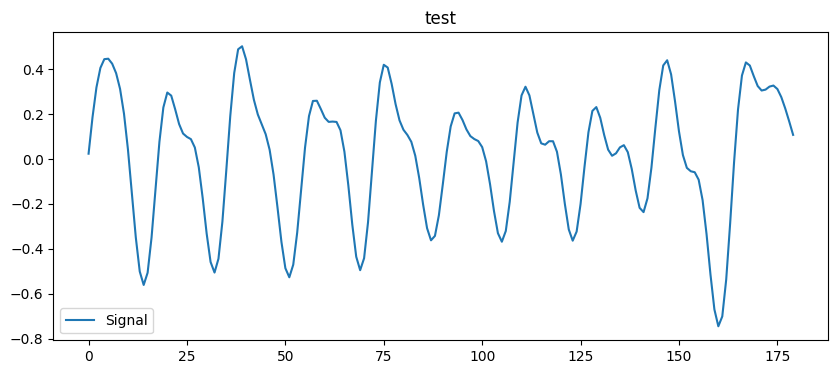

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(bvps_squeezed[0], label='Signal')
plt.title(f"test")
plt.legend()
plt.show()

In [8]:
# 动态设置高度阈值（例如：基于信号幅度的统计）
abs_heights = np.abs(bvps_squeezed)
height_th = np.median(abs_heights) + 0.5 * np.std(abs_heights)  # 中位数+0.5倍标准差
non_overlap_idx = round(bvps_squeezed.shape[1] / 6 * 5)

In [9]:
from scipy.signal import find_peaks

def adaptive_peak_detection(signal, fs=30):
    """自适应参数峰值检测"""
    # 基于信号统计的动态参数
    abs_signal = np.abs(signal)
    height_th = np.percentile(abs_signal, 75)  # 取75%分位数作为高度阈值

    # 根据心率范围计算distance
    max_bpm = 180
    min_distance = int(fs * 60 / max_bpm)  # 180 BPM → 10 samples

    peaks, _ = find_peaks(
        signal,
        distance=min_distance
    )
    return peaks

In [10]:
all_peaks = [adaptive_peak_detection(sig) for sig in bvps_squeezed]

In [25]:
import matplotlib.pyplot as plt

def plot_n_bvp(n):
    plt.figure(figsize=(10, 4))
    plt.plot(bvps_squeezed[n], label='Signal')
    plt.plot(all_peaks[n], bvps_squeezed[n][all_peaks[n]], "x", label='Peaks')
    plt.title(f"Signal {n}: Found {len(all_peaks[n])} peaks")
    plt.legend()
    plt.show()

In [ ]:
for i in range(55):
    plot_n_bvp(i)

In [11]:
nni_seq = []
interval = bvps_squeezed.shape[1] - non_overlap_idx
print(interval)

for row in range(len(all_peaks)):
    print(all_peaks[row])
    for idx in all_peaks[row]:
        if row == 0 or idx >= non_overlap_idx:
            nni_seq.append(idx + interval * row)


30
[  5  20  39  58  75  94 111 129 147 167]
[ 10  29  46  64  82 100 118 138 158]
[  3  16  35  52  70  88 108 128 149 175]
[  4  22  40  58  78  98 119 140 160]
[ 10  28  48  68  90 110 130 150 170]
[  4  18  38  60  80 100 120 140 159 178]
[  7  31  50  70  90 110 129 148 173]
[  3  20  40  60  80  99 118 137 155 173]
[  9  30  50  69  88 107 125 143 161]
[  4  21  40  59  77  96 114 132 150 168]
[ 10  29  47  66  84 102 120 137 155 172]
[  5  18  36  54  72  90 107 125 142 159 176]
[  5  24  42  60  77  94 112 129 146 162]
[ 12  30  47  64  82  99 116 132 150 169]
[  6  17  34  52  69  86 102 121 138 154 171]
[  4  22  39  56  72  91 108 124 141 157 173]
[  8  26  42  61  78  94 110 127 143 160 176]
[  2  13  32  49  65  82  98 114 131 148 163]
[  2  19  35  52  68  84 101 117 133 149 165]
[  4  22  38  54  71  87 103 119 135 151 165]
[  8  24  41  57  73  89 105 121 135 151 167]
[ 11  27  43  59  75  90 106 121 137 152 167]
[  1  13  29  45  61  76  91 107 122 137 153 167]
[ 15  3

In [12]:
nni_seq2 = [round(x / 3 * 100, 2) for x in nni_seq]

In [14]:
import numpy as np

nni_seq3 = np.diff(nni_seq2)
nni_seq3

array([ 500.  ,  633.33,  633.33,  566.67,  633.33,  566.67,  600.  ,
        600.  ,  666.67,  700.  , 1566.66,  500.  ,  666.67,  666.67,
        633.33,  633.33,  833.34,  400.  ,  600.  ,  600.  ,  633.33,
        600.  ,  566.67,  566.66,  566.67,  566.67,  533.33,  600.  ,
        633.33,  500.  ,  566.67,  533.33,  533.34,  566.66,  533.34,
        566.66, 1066.67,  533.33,  466.67,  533.33,  533.34,  500.  ,
        500.  ,  533.33,  466.67,  533.33,  500.  ,  500.  ,  500.  ,
        533.33,  533.34,  500.  ,  533.33,  466.67,  533.33,  500.  ,
        500.  ,  500.  ,  333.33,  533.34,  500.  ,  500.  ,  500.  ,
        466.66,  533.34,  533.33,  500.  ,  500.  ,  500.  ,  533.33,
        500.  ,  466.67,  533.33,  466.67,  566.67,  433.33,  533.33,
        500.  ,  533.34,  466.66,  533.34,  466.66,  566.67,  666.67,
        333.33,  500.  ,  533.33,  500.  ,  500.  ,  533.34,  500.  ,
        500.  ,  533.33,  466.67,  533.33,  533.33,  533.34,  600.  ,
        566.66,  466

In [16]:
import pickle

with open('../data/nni.pkl', 'wb') as file:
    pickle.dump(nni_seq3, file)


In [1]:
import pickle
import pyhrv.time_domain as td

with open('../data/nni.pkl', 'rb') as file:
    nni_seq = pickle.load(file)

/home/ubuntu/miniconda3/envs/codefest/lib/python3.9/site-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/home/ubuntu/miniconda3/envs/codefest/lib/python3.9/site-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/home/ubuntu/miniconda3/envs/codefest/lib/python3.9/site-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


ReturnTuple(nni_counter=120, nni_mean=553.3333333333334, nni_min=333.33000000000175, nni_max=1566.6599999999999, hr_mean=111.65753884657585, hr_min=38.29803531078856, hr_max=180.00180001799924, hr_std=16.81089529174918, nni_diff_mean=78.43201680672234, nni_diff_min=0, nni_diff_max=1066, sdnn=124.00100152301778, sdnn_index=nan, sdann=nan, rmssd=165.232111985208, sdsd=146.04556634297504, nn50=51, pnn50=42.857142857142854, nn20=91, pnn20=76.47058823529412, nni_histogram=<Figure size 600x600 with 1 Axes>, tinn_n=523.4375, tinn_m=539.0625, tinn=15.625, tri_index=3.6363636363636362)

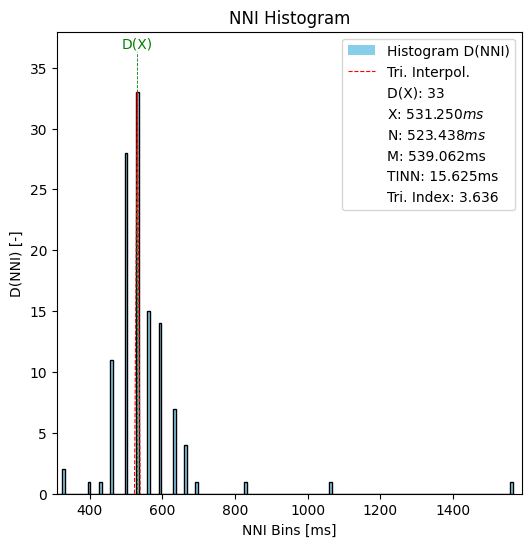

In [2]:
results = td.time_domain(nni=nni_seq)
results

In [8]:
result_dict = results.__dict__
result_dict.pop('nni_histogram', None)
result_dict

OrderedDict([('nni_counter', 120),
             ('nni_mean', 553.3333333333334),
             ('nni_min', 333.33000000000175),
             ('nni_max', 1566.6599999999999),
             ('hr_mean', 111.65753884657585),
             ('hr_min', 38.29803531078856),
             ('hr_max', 180.00180001799924),
             ('hr_std', 16.81089529174918),
             ('nni_diff_mean', 78.43201680672234),
             ('nni_diff_min', 0),
             ('nni_diff_max', 1066),
             ('sdnn', 124.00100152301778),
             ('sdnn_index', nan),
             ('sdann', nan),
             ('rmssd', 165.232111985208),
             ('sdsd', 146.04556634297504),
             ('nn50', 51),
             ('pnn50', 42.857142857142854),
             ('nn20', 91),
             ('pnn20', 76.47058823529412),
             ('tinn_n', 523.4375),
             ('tinn_m', 539.0625),
             ('tinn', 15.625),
             ('tri_index', 3.6363636363636362)])

In [1]:
import opensmile

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)
y = smile.process_file('audio.wav')

LibsndfileError: Error opening '/home/ubuntu/app/audio.wav': System error.

2025-03-01 21:49:28.947236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-01 21:49:29.064247: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# CUDA devices:  1
# device number  0 :  Tesla T4

Processing Video ../data/vid.avi

Roi processing...


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


 - Extraction approach: holistic
 - Number of windows: 62
 - Win size: (#ROI, #landmarks, #frames) =  (1, 3, 180)

Pre filtering...
 - Pre-filter applied: BPfilter

BVP extraction...
 - Extraction method: cupy_CHROM
 - Post-filter applied: BPfilter

BPM estimation...
 - roi appproach: holistic

...done!

Function 'vhr_process' executed in 21.8435 seconds.
Function 'bvp_transform' executed in 0.0649 seconds.


/home/ubuntu/miniconda3/envs/codefest/lib/python3.9/site-packages/pyhrv/utils.py:367: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/home/ubuntu/miniconda3/envs/codefest/lib/python3.9/site-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/home/ubuntu/miniconda3/envs/codefest/lib/python3.9/site-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


Function 'hrv_process' executed in 5.6644 seconds.


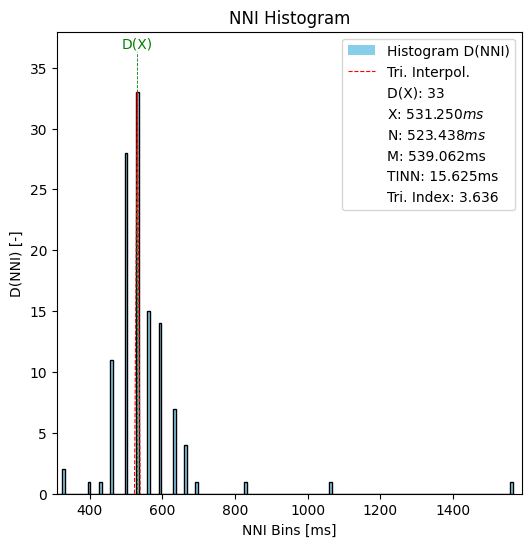

In [1]:
from data_process_tools import *

# Step 1: Process video → Extract bvps, timesES, bpmES
bvps, timesES, bpmES = vhr_process('../data/vid.avi')

# Step 2: Transform bvps → Get NN intervals (nni_seq)
nni_seq = bvp_transform(bvps)

# Step 3: Compute HRV results → Return final HRV data
hrv_results = hrv_process(nni_seq, '../data/nni_histogram.png')

In [9]:
temp = hrv_results
for k, v in hrv_results.items():
    print(type(v))

<class 'int'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'numpy.float64'>
<class 'float'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [10]:
timesES

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59., 60., 61., 62., 63., 64.], dtype=float32)